In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy.stats import skew
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn .model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy.stats import skew
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:/Users/91954/Desktop/abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
dfc=df

In [5]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# checking null values

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [8]:
df['Rings'].dtypes

dtype('int64')

In [9]:
df.loc[df['Rings']=='']#checkling columns for blank spaces

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


In [10]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:
df.Length.unique()

array([0.455, 0.35 , 0.53 , 0.44 , 0.33 , 0.425, 0.545, 0.475, 0.55 ,
       0.525, 0.43 , 0.49 , 0.535, 0.47 , 0.5  , 0.355, 0.365, 0.45 ,
       0.38 , 0.565, 0.615, 0.56 , 0.58 , 0.59 , 0.605, 0.575, 0.68 ,
       0.665, 0.705, 0.465, 0.54 , 0.24 , 0.205, 0.21 , 0.39 , 0.46 ,
       0.325, 0.52 , 0.4  , 0.485, 0.405, 0.445, 0.245, 0.505, 0.595,
       0.31 , 0.555, 0.57 , 0.6  , 0.62 , 0.625, 0.695, 0.36 , 0.51 ,
       0.435, 0.495, 0.385, 0.515, 0.37 , 0.27 , 0.375, 0.7  , 0.71 ,
       0.265, 0.305, 0.345, 0.65 , 0.28 , 0.175, 0.17 , 0.635, 0.645,
       0.61 , 0.725, 0.235, 0.315, 0.225, 0.64 , 0.63 , 0.585, 0.42 ,
       0.335, 0.415, 0.275, 0.295, 0.075, 0.13 , 0.11 , 0.16 , 0.23 ,
       0.3  , 0.32 , 0.655, 0.66 , 0.2  , 0.165, 0.19 , 0.74 , 0.34 ,
       0.675, 0.745, 0.685, 0.69 , 0.67 , 0.29 , 0.26 , 0.395, 0.41 ,
       0.22 , 0.255, 0.735, 0.155, 0.48 , 0.195, 0.25 , 0.18 , 0.15 ,
       0.215, 0.73 , 0.715, 0.765, 0.185, 0.285, 0.72 , 0.75 , 0.755,
       0.78 , 0.815,

In [12]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [13]:
df_categorical=df[["Sex"]]#seperating categorical data and performing visualization techniques

In [14]:
df_categorical.columns

Index(['Sex'], dtype='object')

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


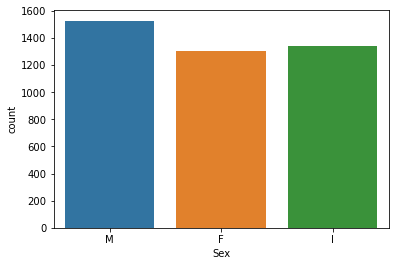

In [15]:
ax=sns.countplot(x='Sex',data=df_categorical)
print(df_categorical["Sex"].value_counts())

In [16]:
##visualization of continuos data

C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length', ylabel='Density'>

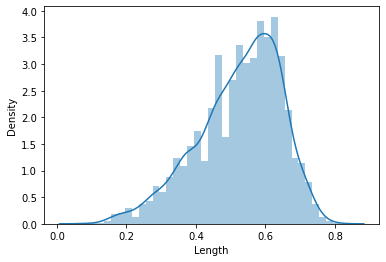

In [17]:
sns.distplot(df["Length"])

In [18]:
#we can see little bit skewness in the column.

In [19]:
df['Length'].min()

0.075

In [20]:
df['Length'].describe()#we dont see much difference in values of this column.

count    4177.000000
mean        0.523992
std         0.120093
min         0.075000
25%         0.450000
50%         0.545000
75%         0.615000
max         0.815000
Name: Length, dtype: float64

C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

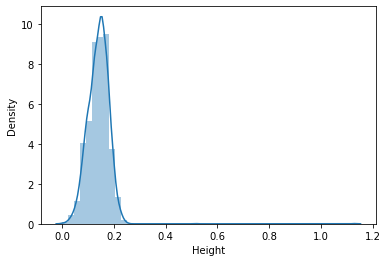

In [21]:
sns.distplot(df["Height"])

In [22]:
df["Height"].min()# can height be zero??

0.0

In [23]:
df['Height'].unique()

array([0.095, 0.09 , 0.135, 0.125, 0.08 , 0.15 , 0.14 , 0.11 , 0.145,
       0.1  , 0.13 , 0.085, 0.155, 0.165, 0.185, 0.18 , 0.175, 0.2  ,
       0.105, 0.045, 0.055, 0.05 , 0.12 , 0.07 , 0.16 , 0.06 , 0.17 ,
       0.195, 0.19 , 0.115, 0.075, 0.065, 0.215, 0.21 , 0.23 , 0.205,
       0.22 , 0.04 , 0.01 , 0.03 , 0.035, 0.225, 0.24 , 0.235, 0.02 ,
       0.025, 0.015, 0.   , 0.515, 0.25 , 1.13 ])

In [24]:
df['Height'].describe()

count    4177.000000
mean        0.139516
std         0.041827
min         0.000000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64

In [25]:
df.loc[df['Height']==0]#here height is o but can ther be zero height 

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [26]:
 df.sort_values(by='Height', ascending=True)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3996,I,0.315,0.230,0.000,0.1340,0.0575,0.0285,0.3505,6
1257,I,0.430,0.340,0.000,0.4280,0.2065,0.0860,0.1150,8
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
2169,I,0.165,0.115,0.015,0.0145,0.0055,0.0030,0.0050,4
1174,F,0.635,0.495,0.015,1.1565,0.5115,0.3080,0.2885,9
...,...,...,...,...,...,...,...,...,...
1763,M,0.775,0.630,0.250,2.7795,1.3485,0.7600,0.5780,12
1428,F,0.815,0.650,0.250,2.2550,0.8905,0.4200,0.7975,14
2179,F,0.595,0.470,0.250,1.2830,0.4620,0.2475,0.4450,14
1417,M,0.705,0.565,0.515,2.2100,1.1075,0.4865,0.5120,10


In [27]:
df=df[df['Height']!= 0]#we are removing 0 values rows from df as we are not sure that this can be taken or not with mean or any thing else

In [28]:
df.loc[df['Height']==0]#we hv removed them

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


In [29]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [30]:
dfc

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [31]:
df.iloc[3996]

Sex                    I
Length             0.375
Diameter            0.28
Height              0.08
Whole weight      0.2235
Shucked weight     0.115
Viscera weight     0.043
Shell weight       0.055
Rings                  6
Name: 3998, dtype: object

C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

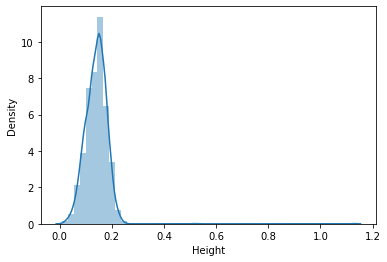

In [32]:
sns.distplot(df["Height"])#we dont see skewness from visualization here.

C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Diameter', ylabel='Density'>

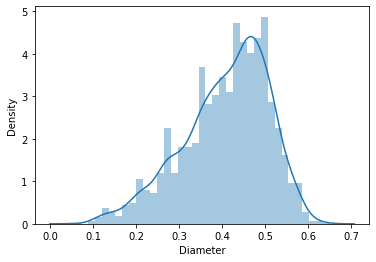

In [33]:
sns.distplot(df["Diameter"])

In [34]:
df["Diameter"].min()# we can see some skewness in the column

0.055

In [35]:
df["Diameter"].describe()

count    4175.00000
mean        0.40794
std         0.09922
min         0.05500
25%         0.35000
50%         0.42500
75%         0.48000
max         0.65000
Name: Diameter, dtype: float64

C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

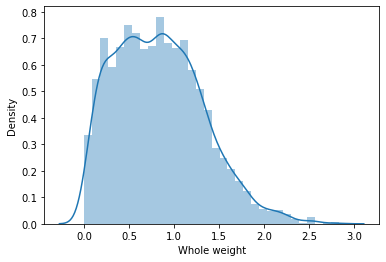

In [36]:
sns.distplot(df["Whole weight"])

In [37]:
df['Whole weight'].describe()

count    4175.000000
mean        0.829005
std         0.490349
min         0.002000
25%         0.442250
50%         0.800000
75%         1.153500
max         2.825500
Name: Whole weight, dtype: float64

In [38]:
df.sort_values(by="Whole weight", ascending=True)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
238,I,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
2114,I,0.130,0.095,0.035,0.0105,0.0050,0.0065,0.0035,4
237,I,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
1429,I,0.140,0.105,0.035,0.0140,0.0055,0.0025,0.0040,3
...,...,...,...,...,...,...,...,...,...
165,M,0.725,0.570,0.190,2.5500,1.0705,0.4830,0.7250,14
1051,F,0.735,0.600,0.220,2.5550,1.1335,0.4400,0.6000,11
1209,F,0.780,0.630,0.215,2.6570,1.4880,0.4985,0.5860,11
1763,M,0.775,0.630,0.250,2.7795,1.3485,0.7600,0.5780,12


C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

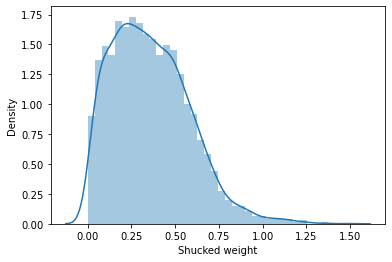

In [39]:
sns.distplot(df["Shucked weight"])

In [40]:
df['Shucked weight'].describe()#here we can see some skewness which shows that it could have outliers also 
                                #as the 75% and max  have a little ,more gap than normal

count    4175.000000
mean        0.359476
std         0.221954
min         0.001000
25%         0.186250
50%         0.336000
75%         0.502000
max         1.488000
Name: Shucked weight, dtype: float64

In [41]:
df.sort_values(by="Shucked weight", ascending=True)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
238,I,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
719,I,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2
237,I,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
696,I,0.155,0.105,0.050,0.0175,0.0050,0.0035,0.0050,4
...,...,...,...,...,...,...,...,...,...
3713,M,0.710,0.555,0.175,2.1400,1.2455,0.3725,0.4340,11
2811,M,0.725,0.570,0.190,2.3305,1.2530,0.5410,0.5200,9
1763,M,0.775,0.630,0.250,2.7795,1.3485,0.7600,0.5780,12
1528,M,0.725,0.575,0.240,2.2100,1.3510,0.4130,0.5015,13


C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

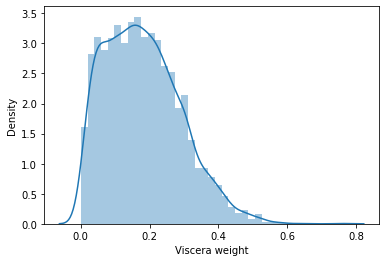

In [42]:
sns.distplot(df["Viscera weight"])  

In [43]:
df['Viscera weight'].describe()# here also we can see a little bit of skewness above.

count    4175.000000
mean        0.180653
std         0.109605
min         0.000500
25%         0.093500
50%         0.171000
75%         0.253000
max         0.760000
Name: Viscera weight, dtype: float64

In [44]:
df.sort_values(by="Viscera weight", ascending=True)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
3522,I,0.240,0.185,0.060,0.0655,0.0295,0.0005,0.0200,4
238,I,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
694,I,0.165,0.110,0.020,0.0190,0.0065,0.0025,0.0050,4
1429,I,0.140,0.105,0.035,0.0140,0.0055,0.0025,0.0040,3
...,...,...,...,...,...,...,...,...,...
3715,M,0.780,0.600,0.210,2.5480,1.1945,0.5745,0.6745,11
3427,M,0.740,0.605,0.200,2.4925,1.1455,0.5750,0.5235,13
2334,F,0.800,0.630,0.195,2.5260,0.9330,0.5900,0.6200,23
1762,M,0.770,0.620,0.195,2.5155,1.1155,0.6415,0.6420,12


C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

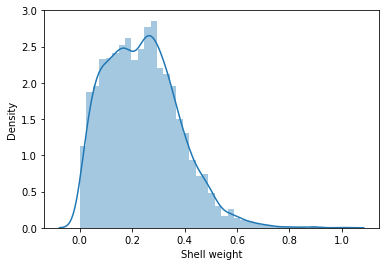

In [45]:
sns.distplot(df["Shell weight"])  

In [46]:
df['Shell weight'].describe()# the data is not normalised as there is a little bit of skewness

count    4175.000000
mean        0.238834
std         0.139212
min         0.001500
25%         0.130000
50%         0.234000
75%         0.328750
max         1.005000
Name: Shell weight, dtype: float64

In [47]:
df.sort_values(by="Shell weight", ascending=True)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
238,I,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
2114,I,0.130,0.095,0.035,0.0105,0.0050,0.0065,0.0035,4
1429,I,0.140,0.105,0.035,0.0140,0.0055,0.0025,0.0040,3
237,I,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
...,...,...,...,...,...,...,...,...,...
166,F,0.725,0.575,0.175,2.1240,0.7650,0.4515,0.8500,20
2161,F,0.715,0.565,0.240,2.1995,0.7245,0.4650,0.8850,17
2108,M,0.665,0.535,0.225,2.1835,0.7535,0.3910,0.8850,27
891,M,0.730,0.595,0.230,2.8255,1.1465,0.4190,0.8970,17


C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rings', ylabel='Density'>

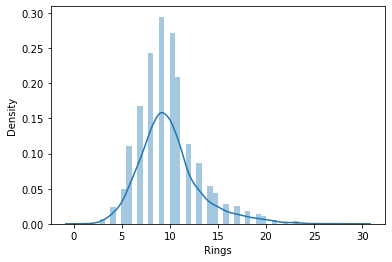

In [48]:
sns.distplot(df["Rings"])  # this is a target data .

In [49]:
df['Rings'].describe()

count    4175.000000
mean        9.935090
std         3.224227
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

In [50]:
df['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [51]:
df.sort_values(by="Rings", ascending=True)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
719,I,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2
238,I,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
237,I,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
3521,I,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3
...,...,...,...,...,...,...,...,...,...
2201,F,0.645,0.490,0.215,1.4060,0.4265,0.2285,0.5100,25
294,M,0.600,0.495,0.195,1.0575,0.3840,0.1900,0.3750,26
2209,F,0.550,0.465,0.180,1.2125,0.3245,0.2050,0.5250,27
2108,M,0.665,0.535,0.225,2.1835,0.7535,0.3910,0.8850,27


In [52]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [53]:
Y=df['Rings']
X=df.drop(columns = ['Rings'])

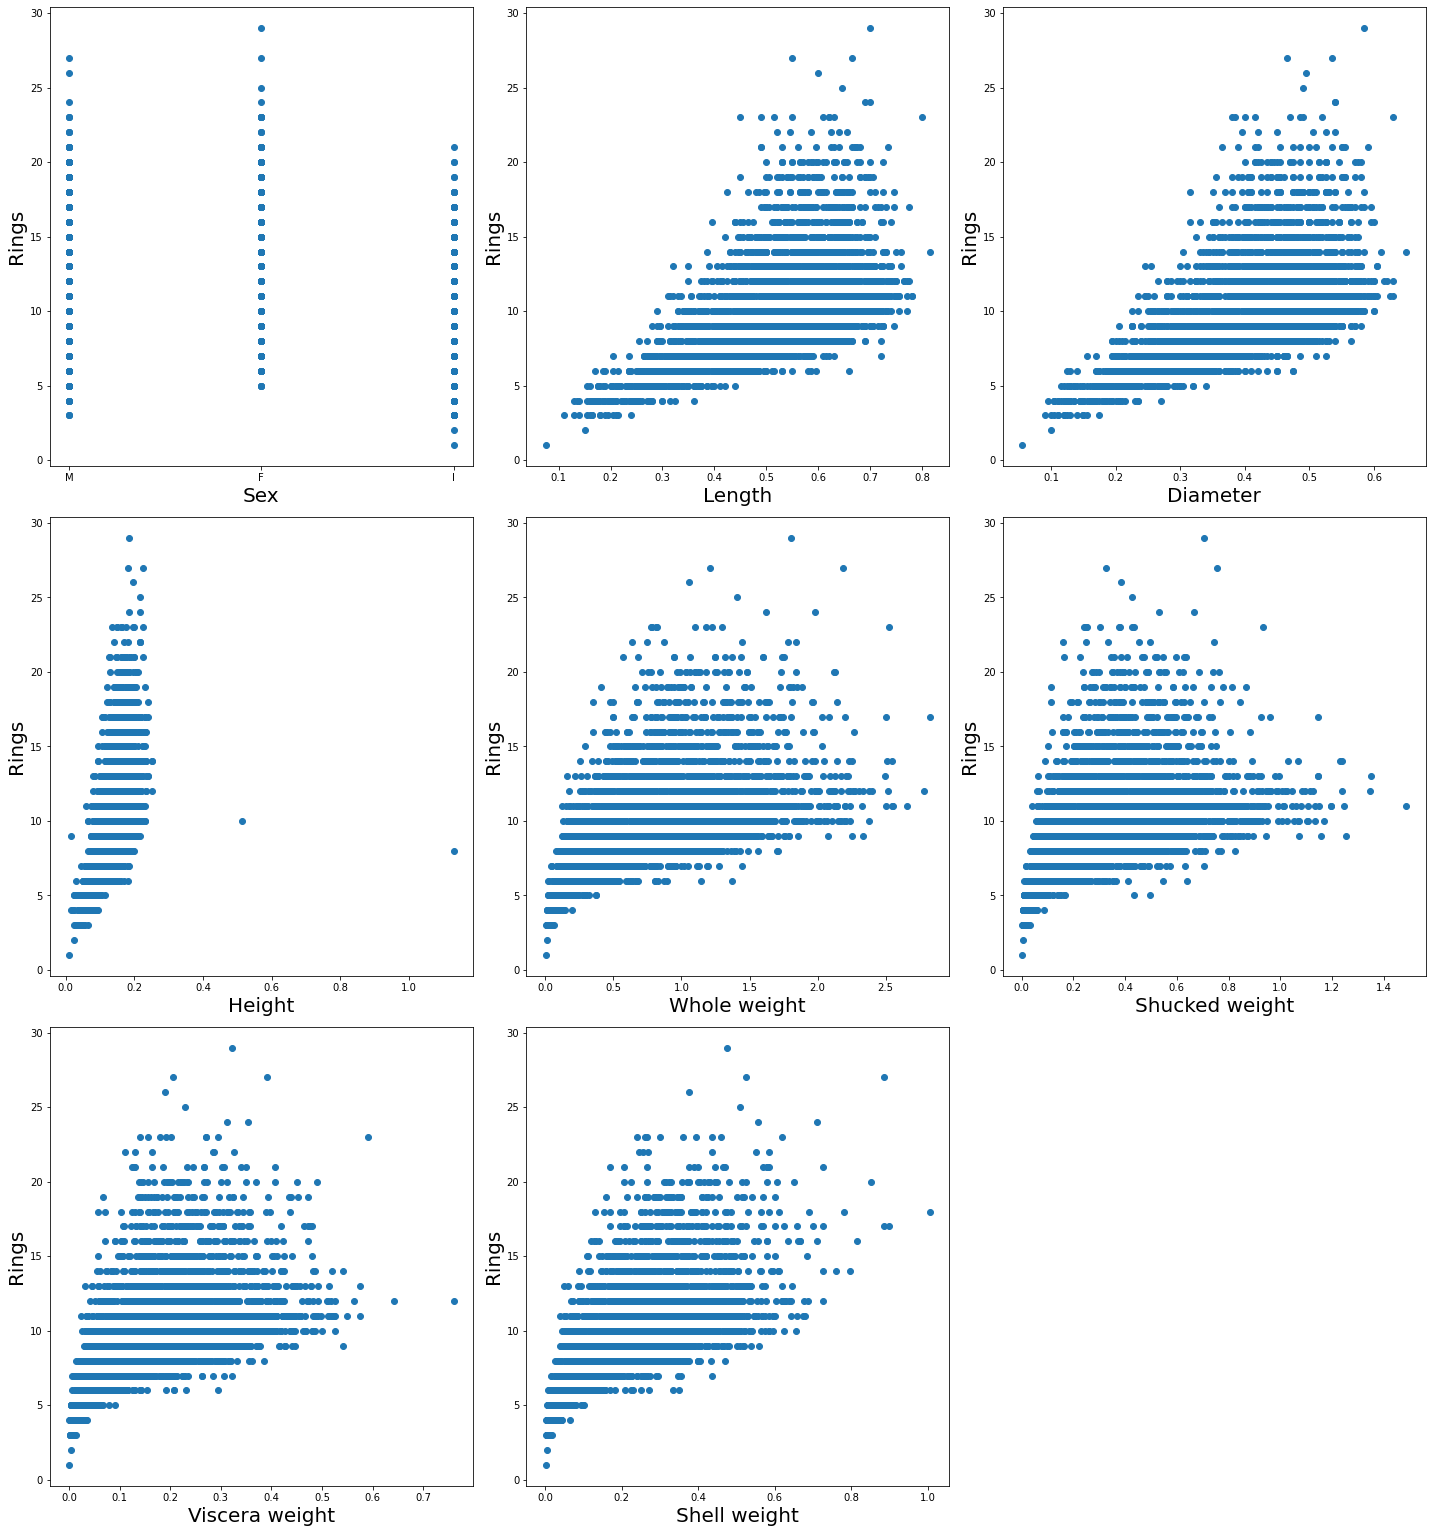

In [54]:
plt.figure(figsize=(20,35),facecolor='white')
plotnumber = 1

for  column in X:
    if plotnumber<=10:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Rings',fontsize=20)
         
    plotnumber+=1
plt.tight_layout()

In [55]:
# we can see that most of the data is normal distributed data from the above plot, only height is showing the normal distributed line but it is not gonna effect because the height can be limited to a kind.

In [56]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986802,0.828108,0.925217,0.897859,0.902960,0.898419,0.556464
Diameter,0.986802,1.000000,0.834298,0.925414,0.893108,0.899672,0.906084,0.574418
Height,0.828108,0.834298,1.000000,0.819886,0.775621,0.798908,0.819596,0.557625
Whole weight,0.925217,0.925414,0.819886,1.000000,0.969389,0.966354,0.955924,0.540151
Shucked weight,0.897859,0.893108,0.775621,0.969389,1.000000,0.931924,0.883129,0.420597
Viscera weight,0.902960,0.899672,0.798908,0.966354,0.931924,1.000000,0.908186,0.503562
Shell weight,0.898419,0.906084,0.819596,0.955924,0.883129,0.908186,1.000000,0.627928
Rings,0.556464,0.574418,0.557625,0.540151,0.420597,0.503562,0.627928,1.000000


In [57]:
#we can see the highest and lowest corr with ring is shell weight and shucked weight respectively
#and all of them has a consistent gap in corr with ring they dont show any exceptional gaps in corr with rings data.

<AxesSubplot:>

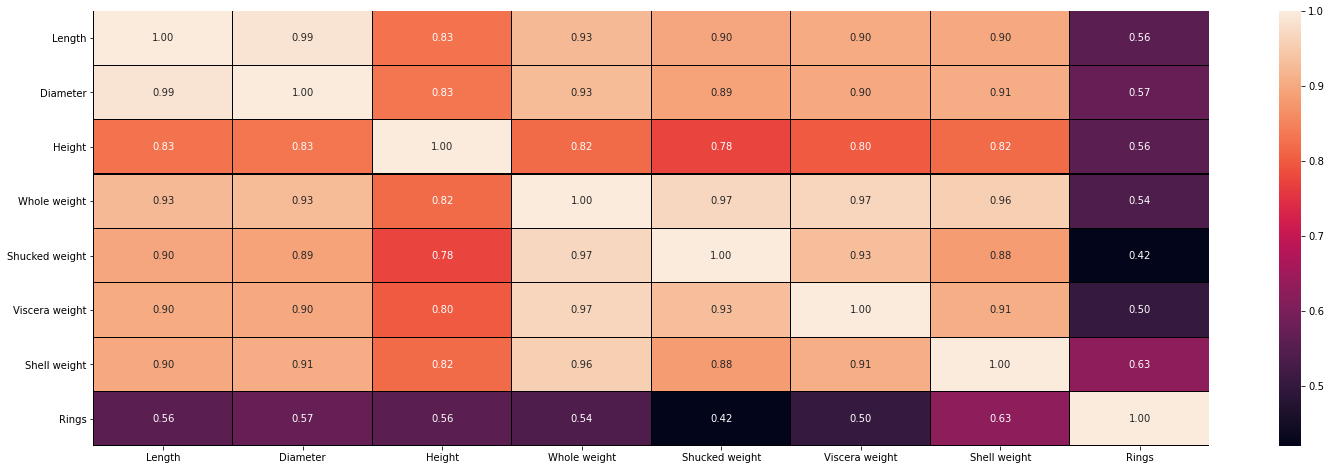

In [58]:
plt.figure(figsize=(25,8),facecolor='white')
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

In [59]:
corr_matrix=df.corr()
corr_matrix["Rings"].sort_values(ascending=True)

Shucked weight    0.420597
Viscera weight    0.503562
Whole weight      0.540151
Length            0.556464
Height            0.557625
Diameter          0.574418
Shell weight      0.627928
Rings             1.000000
Name: Rings, dtype: float64

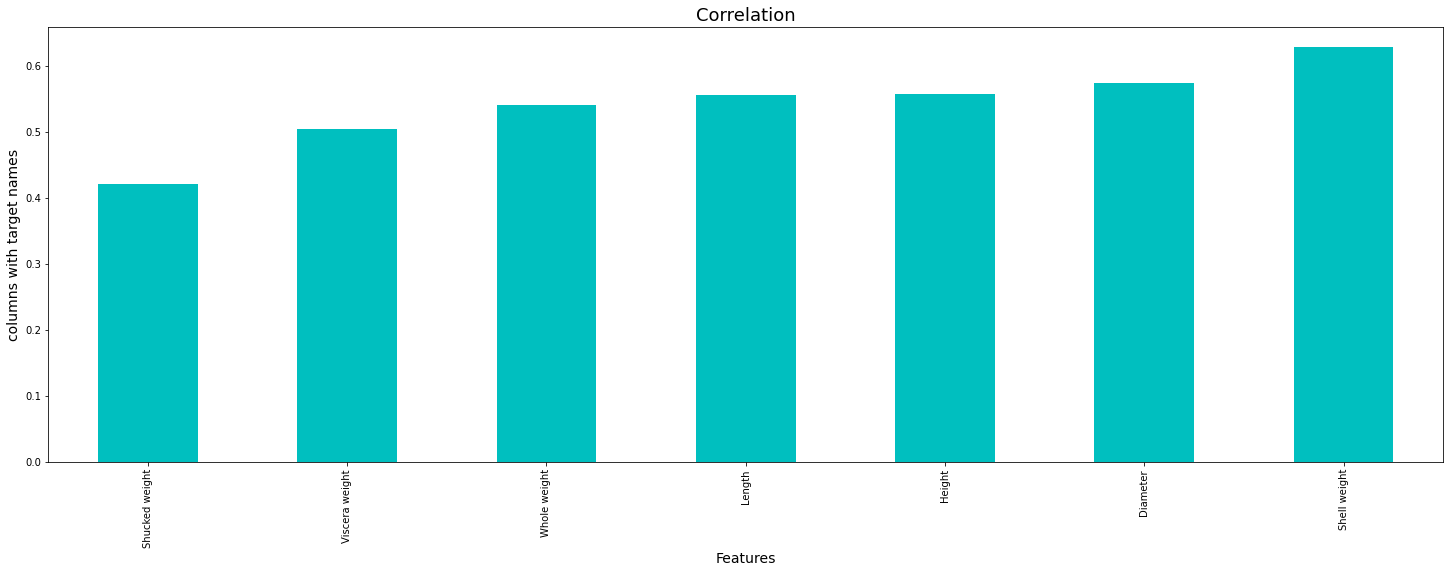

In [60]:
plt.figure(figsize=(25,8))
df.corr()['Rings'].sort_values(ascending=True).drop(['Rings']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [61]:
#we can see the highest and lowest corr with ring is shell weight and shucked weight respectively as we have seen in the above and from here 
#also we can conclude that the data is going in a positively consistent direction, which makes us belive that the data is probably normal distributed data.

In [62]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["Sex"]=LE.fit_transform(df["Sex"])
df["Sex"].value_counts()


<ipython-input-62-5a4a0f39ce14>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sex"]=LE.fit_transform(df["Sex"])


2    1528
1    1340
0    1307
Name: Sex, dtype: int64

In [63]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [64]:
a=df['Sex']
df=df.drop('Sex',axis=1)

In [65]:
df.skew()

Length           -0.640993
Diameter         -0.610182
Height            3.166364
Whole weight      0.530549
Shucked weight    0.718735
Viscera weight    0.591455
Shell weight      0.621081
Rings             1.113754
dtype: float64

In [66]:
#we can see that skewwness range from-o.6/+0.6

In [67]:
#we can conclude from the above visualization techniques:
#length and diameter have  high negTIVE Skewwness and have moderate correlation with the target column and scatter plot shows a moderate 
#graph which is going toward a normal distribution plot
#while height have a moderate correlation but it has min skewness which shows that height is actually normally distributed plot.
#and we can also see highest positive skewness in shucked shell and shell weight ,where shucked shell has the least corr and shell weight has the highest corr with
#target data.

In [68]:
from sklearn.preprocessing import power_transform
df_new=power_transform(df)


df=pd.DataFrame(df_new,columns=df.columns)

    

In [69]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.686323,-0.550653,-1.131194,-0.577527,-0.541664,-0.694037,-0.587784,1.482045
1,-1.397035,-1.388013,-1.272013,-1.352442,-1.312271,-1.333647,-1.332360,-0.949642
2,-0.071544,0.007809,-0.065873,-0.198840,-0.366790,-0.255878,-0.098261,-0.176632
3,-0.798101,-0.550653,-0.322396,-0.572654,-0.592346,-0.548537,-0.544908,0.156362
4,-1.514441,-1.460315,-1.559080,-1.413814,-1.380799,-1.452433,-1.485462,-0.949642
...,...,...,...,...,...,...,...,...
4170,0.249143,0.344993,0.667407,0.241279,0.193534,0.639048,0.192993,0.461848
4171,0.492198,0.229935,-0.065873,0.395074,0.494881,0.432936,0.275196,0.156362
4172,0.592788,0.644647,1.567425,0.777432,0.837655,1.015166,0.598361,-0.176632
4173,0.852905,0.769433,0.307386,0.633312,0.858264,0.814666,0.519113,0.156362


In [70]:
df.skew().sort_values()# we can see that most of the columns have reduced there skewnessbut 

Height           -0.113694
Length           -0.066627
Diameter         -0.065944
Whole weight     -0.004036
Rings             0.004485
Shell weight      0.023378
Shucked weight    0.027266
Viscera weight    0.039660
dtype: float64

In [71]:
df.skew()[np.abs(df.skew())<0.25].all()# as we have taken threshold for skewness0.25

True

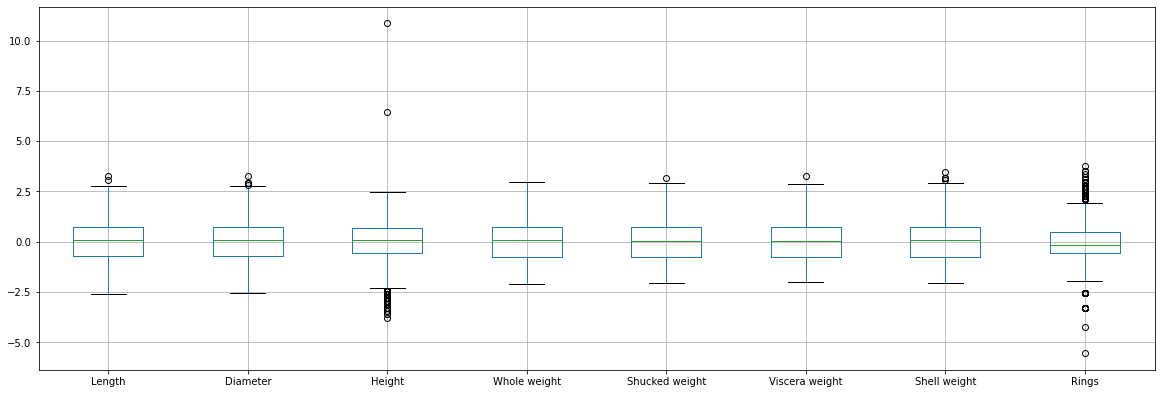

In [72]:
df.iloc[:,0:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [73]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)#we can see these outliers

(array([ 163,  166,  236,  236,  237,  237,  238,  238,  294,  306,  306,
         480,  520,  526,  694,  719,  719,  720,  720,  891,  894, 1054,
        1174, 1209, 1416, 1427, 1427, 1428, 1762, 1986, 2050, 2107, 2107,
        2114, 2160, 2168, 2170, 2171, 2200, 2208, 2333, 2370, 2380, 2710,
        2710, 3148, 3189, 3279, 3471, 3520, 3800, 3901], dtype=int64),
 array([6, 6, 2, 7, 2, 7, 2, 7, 7, 2, 7, 7, 7, 7, 2, 2, 7, 2, 7, 6, 7, 7,
        2, 4, 2, 0, 1, 7, 5, 2, 2, 6, 7, 7, 6, 2, 2, 2, 7, 7, 0, 7, 2, 2,
        7, 7, 2, 7, 7, 7, 7, 2], dtype=int64))

In [75]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.686323,-0.550653,-1.131194,-0.577527,-0.541664,-0.694037,-0.587784,1.482045
1,-1.397035,-1.388013,-1.272013,-1.352442,-1.312271,-1.333647,-1.332360,-0.949642
2,-0.071544,0.007809,-0.065873,-0.198840,-0.366790,-0.255878,-0.098261,-0.176632
3,-0.798101,-0.550653,-0.322396,-0.572654,-0.592346,-0.548537,-0.544908,0.156362
4,-1.514441,-1.460315,-1.559080,-1.413814,-1.380799,-1.452433,-1.485462,-0.949642
...,...,...,...,...,...,...,...,...
4170,0.249143,0.344993,0.667407,0.241279,0.193534,0.639048,0.192993,0.461848
4171,0.492198,0.229935,-0.065873,0.395074,0.494881,0.432936,0.275196,0.156362
4172,0.592788,0.644647,1.567425,0.777432,0.837655,1.015166,0.598361,-0.176632
4173,0.852905,0.769433,0.307386,0.633312,0.858264,0.814666,0.519113,0.156362


In [76]:
Data_loss=((4175-4132)/4175)*100
Data_loss#data we have lost is not much to look at

1.029940119760479

In [77]:
X=df_new_z.drop("Rings",axis=1)
Y=df_new_z['Rings']

In [78]:
X

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-0.686323,-0.550653,-1.131194,-0.577527,-0.541664,-0.694037,-0.587784
1,-1.397035,-1.388013,-1.272013,-1.352442,-1.312271,-1.333647,-1.332360
2,-0.071544,0.007809,-0.065873,-0.198840,-0.366790,-0.255878,-0.098261
3,-0.798101,-0.550653,-0.322396,-0.572654,-0.592346,-0.548537,-0.544908
4,-1.514441,-1.460315,-1.559080,-1.413814,-1.380799,-1.452433,-1.485462
...,...,...,...,...,...,...,...
4170,0.249143,0.344993,0.667407,0.241279,0.193534,0.639048,0.192993
4171,0.492198,0.229935,-0.065873,0.395074,0.494881,0.432936,0.275196
4172,0.592788,0.644647,1.567425,0.777432,0.837655,1.015166,0.598361
4173,0.852905,0.769433,0.307386,0.633312,0.858264,0.814666,0.519113


In [79]:
sc=StandardScaler()# standerdizing the data
X=sc.fit_transform(X)
X

array([[-7.05983650e-01, -5.67350934e-01, -1.19999030e+00, ...,
        -5.54493581e-01, -7.08211723e-01, -6.02154271e-01],
       [-1.43023941e+00, -1.42075448e+00, -1.34823797e+00, ...,
        -1.33535499e+00, -1.35621484e+00, -1.36100230e+00],
       [-7.94889667e-02,  1.81160286e-03, -7.84663511e-02, ...,
        -3.77291974e-01, -2.64303615e-01, -1.03248634e-01],
       ...,
       [ 5.97502935e-01,  6.50851236e-01,  1.64099760e+00, ...,
         8.43180697e-01,  1.02341715e+00,  6.06726366e-01],
       [ 8.62577119e-01,  7.78027355e-01,  3.14484064e-01, ...,
         8.64063135e-01,  8.20287070e-01,  5.25959350e-01],
       [ 1.86293968e+00,  1.75320750e+00,  1.41233541e+00, ...,
         2.12612714e+00,  1.62727220e+00,  1.68707147e+00]])

In [80]:
Y

0       1.482045
1      -0.949642
2      -0.176632
3       0.156362
4      -0.949642
          ...   
4170    0.461848
4171    0.156362
4172   -0.176632
4173    0.156362
4174    0.744126
Name: Rings, Length: 4132, dtype: float64

In [93]:
lr=LinearRegression()
for i in range(0,1000):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=i)
    lr.fit(X_train,Y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state{i},the training accuracy is :- {r2_score(Y_train,pred_train)}")
    print(f"At random state{i},the testing  accuracy is :- {r2_score(Y_test,pred_test)}")
    print('\n')

At random state0,the training accuracy is :- 0.5827281528855321
At random state0,the testing  accuracy is :- 0.5554218443336791


At random state1,the training accuracy is :- 0.5555304306523634
At random state1,the testing  accuracy is :- 0.5926480894453294


At random state2,the training accuracy is :- 0.5746916448277848
At random state2,the testing  accuracy is :- 0.569152468681398


At random state3,the training accuracy is :- 0.5628785427659886
At random state3,the testing  accuracy is :- 0.5819597205022313


At random state4,the training accuracy is :- 0.5688192509703138
At random state4,the testing  accuracy is :- 0.575935008118827


At random state5,the training accuracy is :- 0.584095253706383
At random state5,the testing  accuracy is :- 0.5528004627310886


At random state6,the training accuracy is :- 0.56455370278695
At random state6,the testing  accuracy is :- 0.5849750605080923


At random state7,the training accuracy is :- 0.5682830379717974
At random state7,the testing  a

In [85]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=46)

In [86]:
lr.fit(X_train,Y_train)

LinearRegression()

In [87]:
pred_test=lr.predict(X_test)

In [88]:
print(r2_score(Y_test,pred_test))

0.5820619306079223


In [89]:
#we can see that the accuracy is same as the random state.


In [90]:
#cross validation

In [96]:
Train_accuracy=r2_score(Y_train,pred_train)
Test_accuracy=r2_score(Y_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,X,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}")
    print('\n')
    

At cross fold 2 the cv score is 0.5695833039933118 and accuracy score for training is 0.5614780630355833 and accuracy score for testing is 0.587337774347172


At cross fold 3 the cv score is 0.5565398408780263 and accuracy score for training is 0.5614780630355833 and accuracy score for testing is 0.587337774347172


At cross fold 4 the cv score is 0.520013242310313 and accuracy score for training is 0.5614780630355833 and accuracy score for testing is 0.587337774347172


At cross fold 5 the cv score is 0.49772535979368937 and accuracy score for training is 0.5614780630355833 and accuracy score for testing is 0.587337774347172


At cross fold 6 the cv score is 0.5127137688599939 and accuracy score for training is 0.5614780630355833 and accuracy score for testing is 0.587337774347172


At cross fold 7 the cv score is 0.524579094064725 and accuracy score for training is 0.5614780630355833 and accuracy score for testing is 0.587337774347172


At cross fold 8 the cv score is 0.4990972327364

In [106]:
#as the cv score doesnt impact much to theaccuracy we are taking cv =2

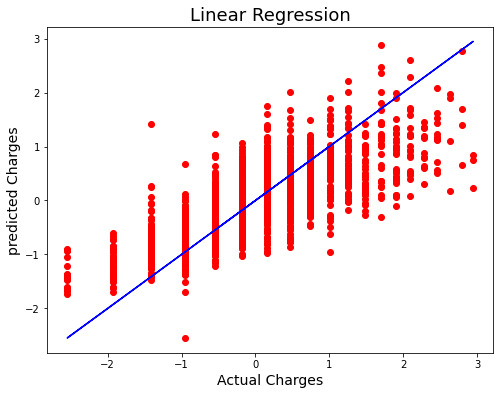

In [97]:
plt.figure(figsize=(8,6))
plt.scatter(x=Y_test,y=pred_test,color='r')
plt.plot(Y_test,Y_test,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('predicted Charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()



In [105]:
#regularization

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={"alpha":[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)



{'alpha': 0.0001, 'random_state': 0}


In [104]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(X_test)
lss=r2_score(Y_test,pred_ls)
lss

-0.000964430034597008

In [116]:
cv_score=cross_val_score(ls,X,Y,cv=2)
cv_mean=cv_score.mean()
cv_mean

-0.0012548092504937047

In [108]:
#ensemble techniques

In [115]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [119]:
rf=RandomForestRegressor(criterion='mae',max_features='log2')
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
pred_decision=rf.predict(X_test)
rfs=r2_score(Y_test,pred_decision)
print('r2_score:',rfs*100)
rfscore=cross_val_score(rf,X,Y,cv=2)
rfc=rfscore.mean()
print('cross_val_score:',rfc*100)


r2_score: 59.65990256562657
cross_val_score: 59.883392906258706


In [120]:
#we are getting model accuracyor we can say r2score and cross val score approximately 60 which not so much good
 


In [123]:
filename='abalone.pkl'
pickle.dump(rf,open(filename,'wb'))


In [126]:
loaded_model=pickle.load(open('abalone.pkl','rb'))
result=loaded_model.score(X_test,Y_test)
print(result)

0.5965990256562657


In [129]:
conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652
Predicted,-1.070316,0.654282,-0.261856,0.156665,-1.780867,-0.195223,0.685453,-0.007262,0.186154,-0.459006,...,0.189818,-0.039714,0.050911,0.196399,0.712573,0.276441,0.466589,0.341331,0.297236,0.390989
Original,-1.070316,0.654282,-0.261856,0.156665,-1.780867,-0.195223,0.685453,-0.007262,0.186154,-0.459006,...,0.189818,-0.039714,0.050911,0.196399,0.712573,0.276441,0.466589,0.341331,0.297236,0.390989


In [ ]:
#so this the model we have build. with 2*1653 data shape in test.